In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [799]:
eeg_long_df = pd.read_csv("big_preprocessed_eeg_df_1_175.csv")

In [977]:
eeg_long_df_nona = eeg_long_df.dropna()

In [973]:
performance = pd.read_csv("task_performance_new.csv")
performance_old = pd.read_csv("performance_1_59.csv")


In [974]:
performance = pd.concat([performance_old,performance])
performance = performance[['subj', 'ses', 'Performance', 'Time (sec)', 'Signal Drop']]
performance = performance.dropna(axis=0, how='all')
performance = performance.drop_duplicates()

In [975]:
performance

,subj,ses,Performance,Time (sec),Signal Drop
0,1,1.0,2.0,494.0,1.0
1,1,3.0,3.0,208.0,1.0
2,2,1.0,0.0,347.0,1.0
3,2,2.0,11.0,628.0,1.0
4,2,3.0,10.0,552.0,0.0
...,...,...,...,...,...
302,180,2.0,11.0,383.0,1.0
303,180,3.0,10.0,383.0,1.0
304,181,1.0,6.0,508.0,1.0
305,181,2.0,7.0,426.0,0.0


In [718]:
# eeg_long_df_old = pd.read_csv("big_preprocessed_eeg_df_epoch1.csv")
# eeg_long_df = pd.concat([eeg_long_df_old, eeg_long_df])

In [800]:
eeg_long_df[["TP9-1", "AF7-1", "AF8-1", "TP10-1", "TP9-2", "AF7-2", "AF8-2", "TP10-2"]] = \
eeg_long_df.loc[:, ["TP9-1", "AF7-1", "AF8-1", "TP10-1", "TP9-2", "AF7-2", "AF8-2", "TP10-2"]].replace(0, np.nan)

In [976]:
eeg_long_df

,Unnamed: 0,level_0,index,epoch,time,TP9-1,AF7-1,AF8-1,TP10-1,TP9-2,AF7-2,AF8-2,TP10-2,subj,ses
0,0,0,0,0,0,NaN,NaN,NaN,NaN,0.523337,3.987578,9.493740,0.499491,1,2
1,1,1,1,0,4,NaN,NaN,NaN,NaN,11.582588,87.751758,103.981922,6.038757,1,2
2,2,2,2,0,8,NaN,NaN,NaN,NaN,21.770822,156.465099,184.323352,11.268438,1,2
3,3,3,3,0,12,NaN,NaN,NaN,NaN,30.354055,198.812422,239.460790,15.880544,1,2
4,4,4,4,0,16,NaN,NaN,NaN,NaN,36.829288,209.820592,263.668332,19.580846,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26830587,26830587,90875,51963,354,980,63.436088,57.079530,48.344287,46.407258,NaN,NaN,NaN,NaN,175,2
26830588,26830588,90876,51964,354,984,59.205256,55.385689,36.192805,22.703361,NaN,NaN,NaN,NaN,175,2
26830589,26830589,90877,51965,354,988,54.826798,54.685868,24.947982,-1.209968,NaN,NaN,NaN,NaN,175,2
26830590,26830590,90878,51966,354,992,50.480458,55.315183,15.482242,-24.126746,NaN,NaN,NaN,NaN,175,2


In [925]:
dropped_time_1 = eeg_long_df[["TP9-1"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()["TP9-1"]
session_size_1 = eeg_long_df[["TP9-1"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).size()
dropped_1 = dropped_time_1/session_size_1
dropped_1 = dropped_1.reset_index()
dropped_time_2 = eeg_long_df[["TP9-2"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()["TP9-2"]
session_size_2 = eeg_long_df[["TP9-2"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).size()
dropped_2 = dropped_time_2/session_size_2
dropped_2 = dropped_2.reset_index()
dropped_time_total = eeg_long_df[["TP9-1", "TP9-2"]].isna().any(axis=1).groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()
dropped_total = dropped_time_total/session_size_2
dropped_total = dropped_total.reset_index()

session_size_1 = eeg_long_df[["TP9-1"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).size()
session_size_1 = session_size_1.reset_index()

In [979]:
eeg_df_group = eeg_long_df_nona.groupby(["subj", "ses"])

In [1013]:
ccf_dict = {}
ccf_dict["TP9"] = {}
ccf_dict["AF7"] = {}
ccf_dict["AF8"] = {}
ccf_dict["TP10"] = {}

sessions_pair = []

for name, group in eeg_df_group:
    if group.shape[0] >= 10*256+1:
        ccf_dict["TP9"][name] = obtain_ccf(group["TP9-1"], group["TP9-2"])
        ccf_dict["AF7"][name] = obtain_ccf(group["AF7-1"], group["AF7-2"])
        ccf_dict["AF8"][name] = obtain_ccf(group["AF8-1"], group["AF8-2"])
        ccf_dict["TP10"][name] = obtain_ccf(group["TP10-1"], group["TP10-2"])
        
        sessions_pair.append(name)

In [1014]:
filtered_pairs = list(dropped_1[(dropped_1[0] <= 0.7) & 
               (dropped_2[0] <= 0.7) & 
               (session_size_1[0]/256/60 >= 3.5)][["subj", "ses"]].itertuples(index=False, name=None))

In [1015]:
sessions_pair_new = list(set(sessions_pair) & set(filtered_pairs))

In [1016]:
len(sessions_pair_new)

80

In [1017]:
ccf_matrix = np.array([list(ccf_dict["TP9"].values()),
list(ccf_dict["AF7"].values()),
list(ccf_dict["AF8"].values()),
list(ccf_dict["TP10"].values())])

In [1018]:
ccf_matrix.shape

(4, 199, 2561)

In [1019]:
select_index = pd.DataFrame(sessions_pair_new)
select_index.columns = ["subj", "ses"]
select_index = select_index.sort_values(["subj", "ses"])

In [1020]:
performance[performance.subj==6]

,subj,ses,Performance,Time (sec),Signal Drop
12,6,2.0,3.0,428.0,0.0
13,6,3.0,11.0,351.0,0.0


In [1021]:
performance_select = select_index.merge(performance, on=["subj", "ses"], how="left")
performance_select = performance_select.dropna().reset_index(drop=True)

In [1022]:
performance_select

,subj,ses,Performance,Time (sec),Signal Drop
0,6,2,3.0,428.0,0.0
1,7,3,0.0,560.0,0.0
2,11,3,7.0,199.0,0.0
3,20,2,1.0,417.0,0.0
4,21,2,3.0,266.0,0.0
...,...,...,...,...,...
66,169,1,0.0,486.0,1.0
67,169,2,2.0,491.0,0.0
68,174,2,7.0,322.0,0.0
69,174,3,9.0,244.0,0.0


In [1023]:
y = performance_select["Performance"].to_numpy()

In [1024]:
y.shape

(71,)

In [1025]:
final_select = list(performance_select[["subj", "ses"]].itertuples(index=False, name=None))

In [1026]:
temp_index = []

for i in final_select:
    for j in range(len(sessions_pair)):
        if i == sessions_pair[j]:
            temp_index.append(j)

In [1027]:
X = ccf_matrix[:,temp_index,:]

In [1028]:
X.shape

(4, 71, 2561)

In [1029]:
correlation_ccf = {}
channels = ["TP9", "AF7", "AF8", "TP10"]
correlation_ccf["TP9"] = []
correlation_ccf["AF7"] = []
correlation_ccf["AF8"] = []
correlation_ccf["TP10"] = []

for k in range(4):
    for i in range(X.shape[2]):
        correlation_ccf[channels[k]].append(pearsonr(X[k,:,i], y))

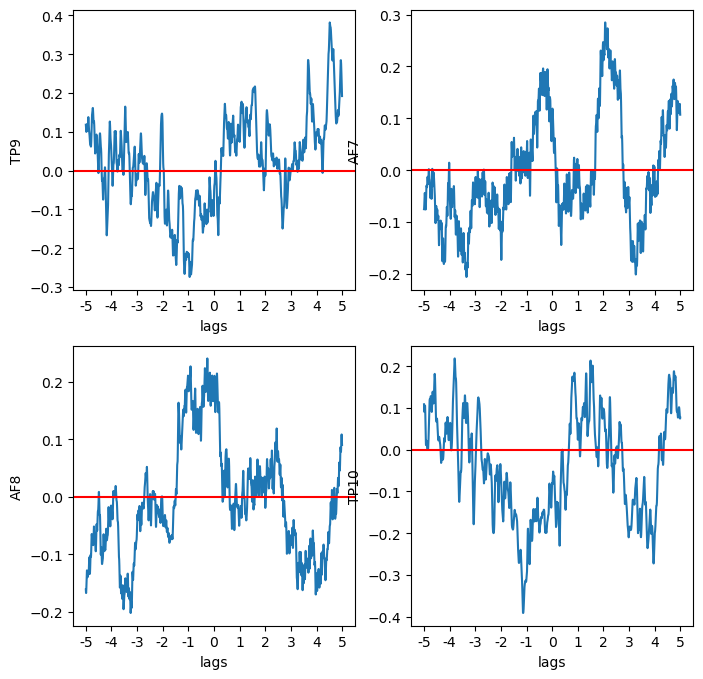

In [1031]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

channels = ["TP9", "AF7", "AF8", "TP10"]
for i in range(4):
    axs[i//2, i%2].plot(np.array(correlation_ccf[channels[i]])[:,0])
    
    axs[i//2, i%2].set_xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256,0).astype(int))
    axs[i//2, i%2].set_xlabel("lags")
    axs[i//2, i%2].set_ylabel(channels[i])
    axs[i//2, i%2].axhline(y=0, color='r', linestyle='-')
    
plt.show()

In [ ]:
t_lags = {}
channels = ["TP9", "AF7", "AF8", "TP10"]
t_lags["TP9"] = []
t_lags["AF7"] = []
t_lags["AF8"] = []
t_lags["TP10"] = []


for i in range(X.shape[2]):
    t_lags[channels[k]].append()

In [1032]:
X.shape

(4, 71, 2561)

In [1079]:
def run_mreg_with_lag(X, y, lag):
    X_temp = X[:,:,lag].T
    X_with_const = sm.add_constant(X_temp)

    model = sm.OLS(y, X_with_const).fit()
    t_values = [i[3] for i in model.summary().tables[1].data[1:]]
    p_values = [i[4] for i in model.summary().tables[1].data[1:]]
    
    t_values = np.array(t_values).astype(float)
    p_values = np.array(p_values).astype(float)
    
    return (t_values, p_values)


In [1080]:
t_values_lags = []
p_values_lags = []
for lag in range(X.shape[2]):
    t_values, p_values = run_mreg_with_lag(X, y, lag)
    t_values_lags.append(t_values)
    p_values_lags.append(p_values)
t_values_lags = np.array(t_values_lags)

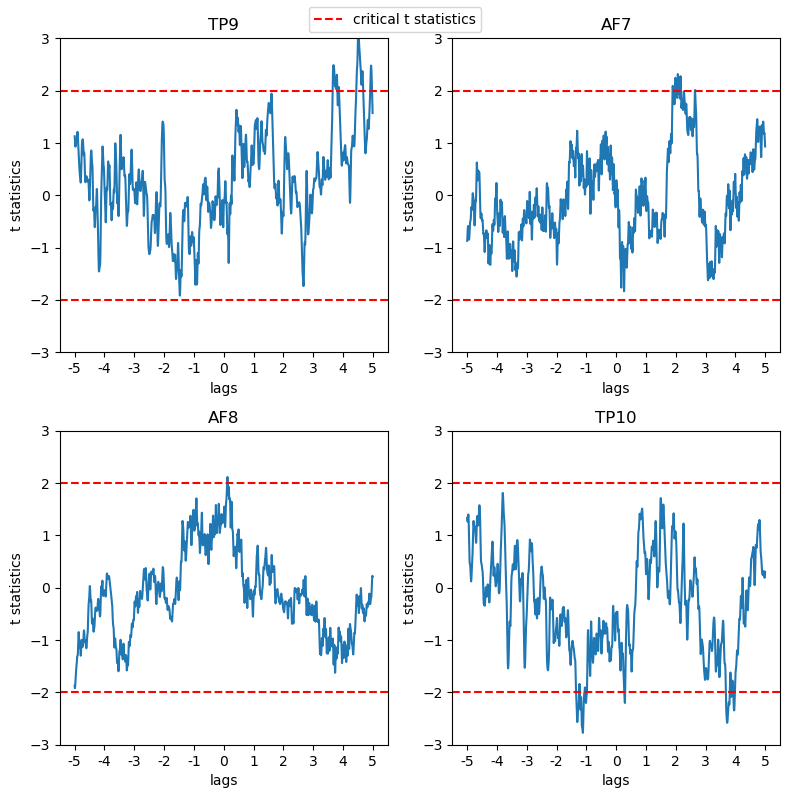

In [1195]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

channels = ["TP9", "AF7", "AF8", "TP10"]
for i in range(4):
    axs[i//2, i%2].plot(t_values_lags[:,1:][:,i])
    
    axs[i//2, i%2].set_xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256,0).astype(int))
    axs[i//2, i%2].set_xlabel("lags")
    axs[i//2, i%2].set_ylabel("t statistics")
#     axs[i//2, i%2].axhline(y=0, color='r', linestyle='-')
    
    axs[i//2, i%2].axhline(y=1.996564, color='r', linestyle='--')
    axs[i//2, i%2].axhline(y=-1.996564, color='r', linestyle='--')
    axs[i//2, i%2].set_title(channels[i])
    axs[i//2, i%2].set_ylim([-3,3])

from matplotlib.lines import Line2D
line = Line2D([0], [0], label='critical t statistics', color='r', linestyle='--')

fig.legend(handles=[line], loc='upper center')

plt.tight_layout()
fig.savefig('ccf.png', dpi=300)
plt.show()

In [1098]:
import statsmodels.stats as stats

In [1091]:
p_values_lags = np.array(p_values_lags)

In [1175]:
fdr_p_list = []
fdr_p_list.append(stats.multitest.fdrcorrection(p_values_lags[:,1], alpha=0.05, method='indep', is_sorted=False)[1])
fdr_p_list.append(stats.multitest.fdrcorrection(p_values_lags[:,2], alpha=0.05, method='indep', is_sorted=False)[1])
fdr_p_list.append(stats.multitest.fdrcorrection(p_values_lags[:,3], alpha=0.05, method='indep', is_sorted=False)[1])
fdr_p_list.append(stats.multitest.fdrcorrection(p_values_lags[:,4], alpha=0.05, method='indep', is_sorted=False)[1])

In [1176]:
fdr_p_list = np.array(fdr_p_list)

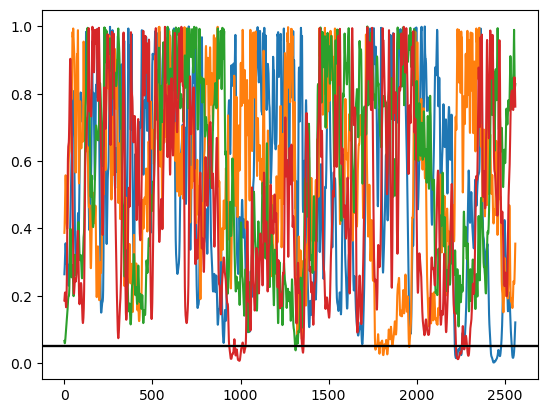

In [1177]:

for i in range(1,5):
    plt.plot(p_values_lags[:,i])
    plt.axhline(y=0.05, color='black', linestyle='-')

plt.show()

In [1178]:
fdr_p_list

array([[0.99828784, 0.99828784, 0.99828784, ..., 0.99828784, 0.99828784,
        0.99828784],
       [0.98131776, 0.98131776, 0.98131776, ..., 0.98131776, 0.98131776,
        0.98131776],
       [0.99816927, 0.99816927, 0.99816927, ..., 0.99816927, 0.99816927,
        0.99816927],
       [0.82693197, 0.82693197, 0.82693197, ..., 0.960375  , 0.95993059,
        0.95993059]])

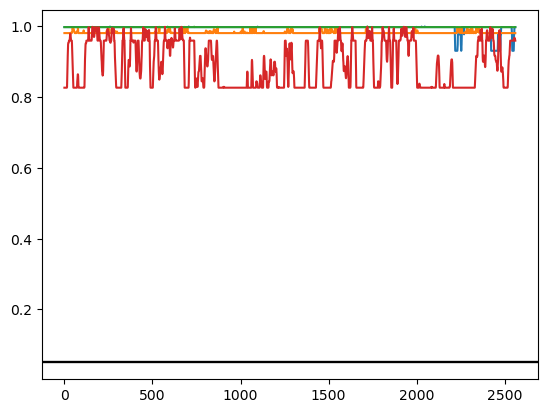

In [1179]:

for i in range(4):
    plt.plot(fdr_p_list[i,:])
    
    plt.axhline(y=0.05, color='black', linestyle='-')

plt.show()

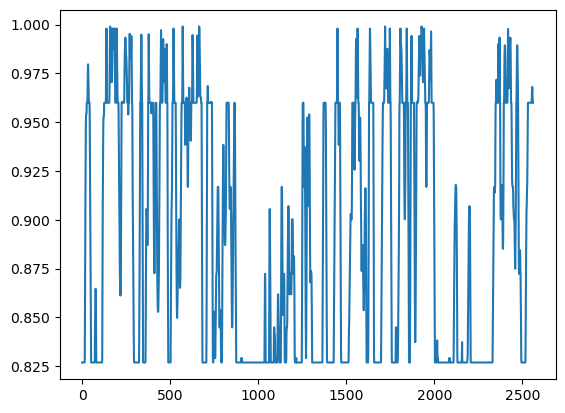

In [1143]:
plt.plot(fdr_p_list[3,:])
plt.show()

In [1112]:
(fdr_p_list <= 0.05).sum()

0

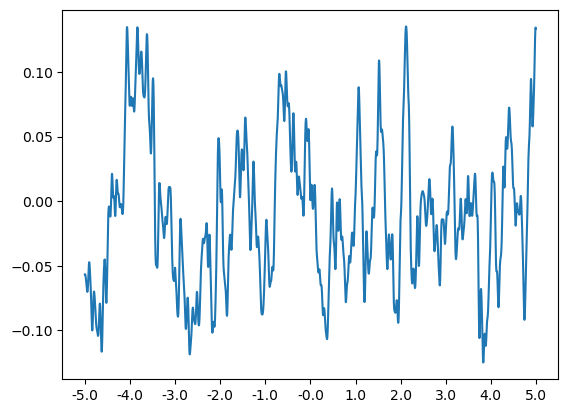

In [883]:
plt.plot(np.array(correlation_ccf["TP9"])[:,0])

plt.xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256))
plt.show()

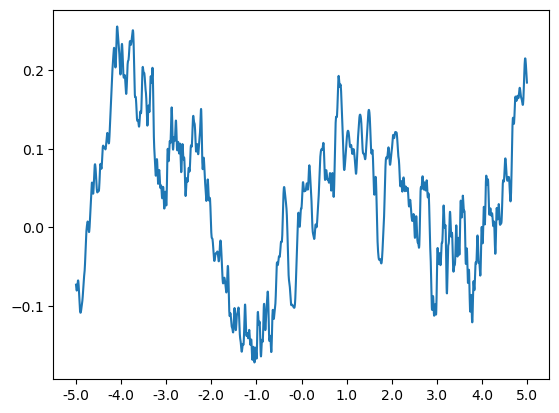

In [884]:
plt.plot(np.array(correlation_ccf["TP10"])[:,0])

plt.xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256))
plt.show()

In [873]:
plt.plot(np.array(correlation_ccf["TP9"])[:,0])

plt.xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256))
plt.show()

1280.0

In [ ]:
plt.plot(np.array(correlation_ccf["TP9"])[:,0])

plt.xticks(np.linspace(0,2561, 11),
           np.round((np.linspace(0,2561, 11)-1281)/256))
plt.show()

In [752]:

import statsmodels.tsa.stattools as smt
def obtain_ccf(ts_1, ts_2, length=5):
    backwards = smt.ccf(ts_1[::-1], ts_2[::-1], adjusted=False)[::-1][-(length*256+1):]
    forwards = smt.ccf(ts_1, ts_2, adjusted=False)[:(length*256+1)]
    ccf_output = np.r_[backwards[:-1], forwards]
    return ccf_output

In [588]:
corr_df_TP9 = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_AF7 = eeg_long_df.groupby(["subj", "ses"])[["AF7-1", "AF7-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_AF8 = eeg_long_df.groupby(["subj", "ses"])[["AF8-1", "AF8-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]
corr_df_TP10 = eeg_long_df.groupby(["subj", "ses"])[["TP10-1", "TP10-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,-1]

corr_df = pd.concat([corr_df_TP9, corr_df_AF7, corr_df_AF8, corr_df_TP10], axis=1)
corr_df.columns = ["TP9", "AF7", "AF8", "TP10"]
corr_df["subj"] = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,0]
corr_df["ses"] = eeg_long_df.groupby(["subj", "ses"])[["TP9-1", "TP9-2"]].corr().iloc[0::2,-1].reset_index().iloc[:,1]

In [589]:
dropped_time_1 = eeg_long_df[["TP9-1"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()["TP9-1"]
session_size_1 = eeg_long_df[["TP9-1"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).size()
dropped_1 = dropped_time_1/session_size_1
dropped_time_2 = eeg_long_df[["TP9-2"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()["TP9-2"]
session_size_2 = eeg_long_df[["TP9-2"]].isna().groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).size()
dropped_2 = dropped_time_2/session_size_2
dropped_time_total = eeg_long_df[["TP9-1", "TP9-2"]].isna().any(axis=1).groupby([eeg_long_df["subj"], eeg_long_df["ses"]]).sum()
dropped_total = dropped_time_total/session_size_2

In [592]:
corr_df["dropped_1"] = dropped_1.to_list()
corr_df["dropped_2"] = dropped_2.to_list()
corr_df["dropped_total"] = dropped_total.to_list()
corr_df["timing"] = np.array(session_size_1.to_list())/256/60

In [593]:
performance

,Unnamed: 0,Performance,Time (sec),Signal Drop,subj,ses
0,0,4.0,528.0,0.0,58,1
1,1,3.0,264.0,0.0,58,2
2,3,4.0,528.0,0.0,59,1
3,4,3.0,264.0,0.0,59,2
4,6,3.0,454.0,1.0,60,1
...,...,...,...,...,...,...
302,367,11.0,383.0,1.0,180,2
303,368,10.0,383.0,1.0,180,3
304,369,6.0,508.0,1.0,181,1
305,370,7.0,426.0,0.0,181,2


In [594]:
corr_df = corr_df.merge(performance, on = ["subj", "ses"], how = "left")

In [599]:
corr_df 

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
0,0.045510,-0.024599,0.012211,0.030654,59,3,0.201566,0.587084,0.679061,8.516667,NaN,NaN,NaN,NaN
1,0.060650,-0.051558,-0.034861,0.038447,60,1,0.510309,0.812715,0.895189,9.700000,6.0,3.0,454.0,1.0
2,-0.010182,0.093458,-0.161952,-0.012660,60,2,0.414003,0.949772,0.971081,10.950000,7.0,3.0,494.0,1.0
3,0.016426,0.036092,-0.000918,-0.066099,60,3,0.606498,0.523466,0.799639,9.233333,8.0,4.0,400.0,0.0
4,-0.037079,-0.258230,0.328920,-0.218062,62,1,0.962466,0.809651,0.994638,6.216667,12.0,8.0,329.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,2,0.858537,0.478049,0.931707,3.416667,343.0,7.0,180.0,0.0
182,-0.432046,0.399743,-0.144200,-0.186687,174,1,0.110403,0.974522,0.980892,7.850000,348.0,9.0,407.0,1.0
183,0.031208,0.015347,0.019999,-0.014736,174,2,0.605479,0.246575,0.676712,6.083333,349.0,7.0,322.0,0.0
184,-0.009230,-0.006618,-0.020977,-0.021123,174,3,0.601399,0.052448,0.611888,4.766667,350.0,9.0,244.0,0.0


In [596]:
corr_df_old = pd.read_csv("cor_par_1_59.csv")

In [602]:
corr_df_old[corr_df.columns]

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
0,-0.004024,-0.035940,0.025466,-0.024614,1,2,0.756208,0.685102,0.931151,14.766667,0,NaN,NaN,0.0
1,0.021468,0.029613,0.010839,-0.003866,2,1,0.814925,0.492537,0.910448,5.583333,1,0.0,347.0,1.0
2,0.197148,-0.092718,-0.115505,0.051283,2,3,0.942907,0.816609,0.994810,9.633333,2,10.0,552.0,0.0
3,-0.020244,0.060562,0.098295,-0.059401,3,1,0.516393,0.819672,0.918033,6.100000,3,6.0,271.0,0.0
4,0.070347,0.037173,0.005243,-0.085170,3,2,0.603125,0.784375,0.887500,5.333333,4,7.0,294.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0.032404,-0.149722,-0.344336,0.089214,54,3,0.830258,0.453875,0.918819,4.516667,99,7.0,239.0,0.0
100,0.027392,0.013720,0.019481,0.032824,55,1,0.673729,0.826271,0.932203,3.933333,100,2.0,331.0,0.0
101,-0.060761,0.015996,-0.108148,-0.008187,57,3,0.573684,0.826316,0.921053,3.166667,101,11.0,164.0,0.0
102,-0.020645,-0.012629,0.020788,-0.038035,58,3,0.929946,0.834488,0.971517,21.650000,102,NaN,NaN,1.0


In [604]:
corr_df = pd.concat([corr_df_old[corr_df.columns], corr_df]).reset_index(drop=True)

In [606]:
corr_df = corr_df.dropna()

In [607]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
1,0.021468,0.029613,0.010839,-0.003866,2,1,0.814925,0.492537,0.910448,5.583333,1.0,0.0,347.0,1.0
2,0.197148,-0.092718,-0.115505,0.051283,2,3,0.942907,0.816609,0.994810,9.633333,2.0,10.0,552.0,0.0
3,-0.020244,0.060562,0.098295,-0.059401,3,1,0.516393,0.819672,0.918033,6.100000,3.0,6.0,271.0,0.0
4,0.070347,0.037173,0.005243,-0.085170,3,2,0.603125,0.784375,0.887500,5.333333,4.0,7.0,294.0,0.0
5,-0.002365,-0.002884,0.046474,0.013973,3,3,0.804795,0.613014,0.914384,4.866667,5.0,7.0,262.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.080516,-0.053196,-0.097793,0.073627,172,2,0.858537,0.478049,0.931707,3.416667,343.0,7.0,180.0,0.0
286,-0.432046,0.399743,-0.144200,-0.186687,174,1,0.110403,0.974522,0.980892,7.850000,348.0,9.0,407.0,1.0
287,0.031208,0.015347,0.019999,-0.014736,174,2,0.605479,0.246575,0.676712,6.083333,349.0,7.0,322.0,0.0
288,-0.009230,-0.006618,-0.020977,-0.021123,174,3,0.601399,0.052448,0.611888,4.766667,350.0,9.0,244.0,0.0


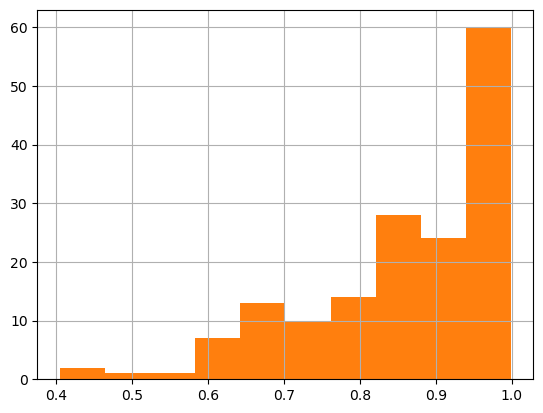

In [87]:
corr_df.dropped_total.hist()
plt.show()

In [25]:
# corr_df.to_csv("corr_df_na_epoch1.csv")

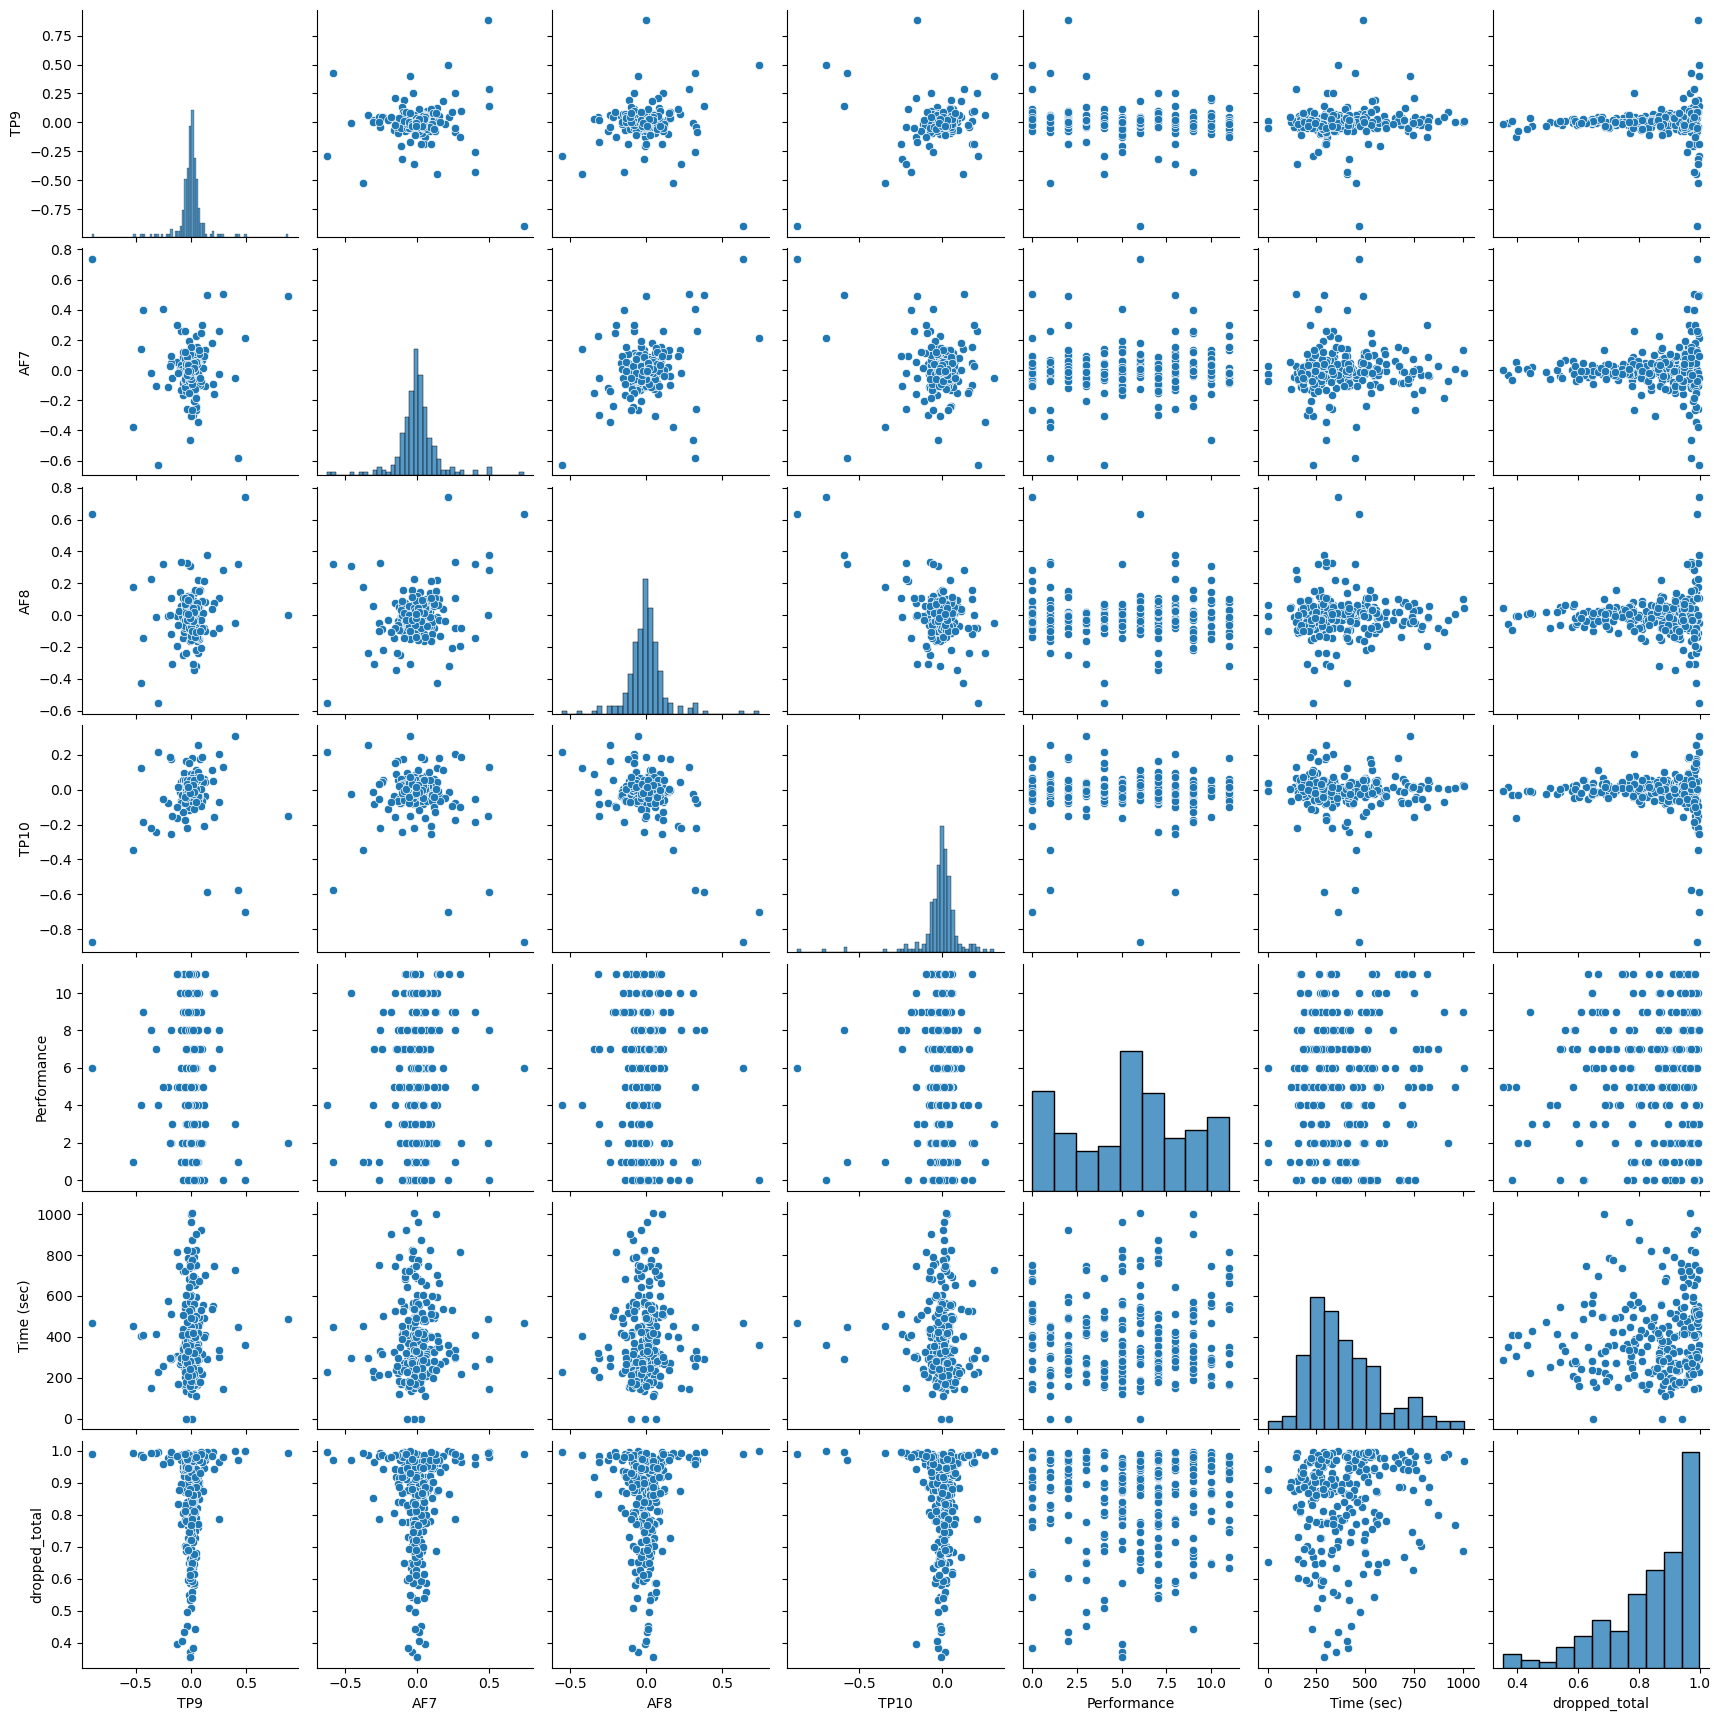

In [608]:
sns.pairplot(corr_df[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)", "dropped_total"]])
plt.show()

In [22]:
from matplotlib import pyplot as plt

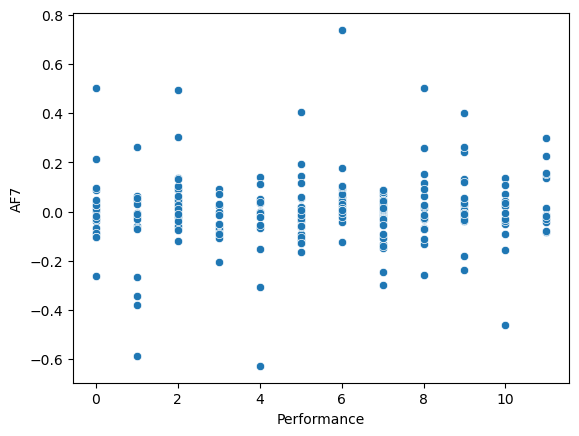

In [727]:
sns.scatterplot(data=corr_df, x="Performance", y="AF7")
plt.show()

In [24]:
from scipy.stats import pearsonr, zscore

In [25]:
def drop_outlier(data, variables, threth):
    temp_data = data.copy()
    temp_data = temp_data.dropna()
    temp_data_no_outlier = temp_data[(np.abs(zscore(temp_data[variables])) < threth).all(axis=1)]
    return temp_data_no_outlier

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Subject,Session,Performance,Time (sec),Signal Drop
1,0.021468,0.029613,0.010839,-0.003866,2,1,0.814925,0.492537,0.910448,5.583333,2,1.0,0.0,347.0,1.0
2,0.197148,-0.092718,-0.115505,0.051283,2,3,0.942907,0.816609,0.994810,9.633333,2,3.0,10.0,552.0,0.0
3,-0.020244,0.060562,0.098295,-0.059401,3,1,0.516393,0.819672,0.918033,6.100000,3,1.0,6.0,271.0,0.0
4,0.070347,0.037173,0.005243,-0.085170,3,2,0.603125,0.784375,0.887500,5.333333,3,2.0,7.0,294.0,0.0
5,-0.002365,-0.002884,0.046474,0.013973,3,3,0.804795,0.613014,0.914384,4.866667,3,3.0,7.0,262.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.052476,-0.030108,-0.028624,0.015455,53,1,0.623223,0.443128,0.784360,7.033333,53,1.0,8.0,380.0,0.0
98,0.011856,0.097814,-0.068625,0.023159,54,2,0.898839,0.461028,0.946932,10.050000,54,2.0,6.0,546.0,1.0
100,0.027392,0.013720,0.019481,0.032824,55,1,0.673729,0.826271,0.932203,3.933333,55,1.0,2.0,331.0,0.0
101,-0.060761,0.015996,-0.108148,-0.008187,57,3,0.573684,0.826316,0.921053,3.166667,57,3.0,11.0,164.0,0.0


In [26]:
def plot_scatter(data, variables, threth):
    temp_data = data.copy()
    temp_data_no_outlier = drop_outlier(temp_data, variables, threth)
    x = variables[0]
    y = variables[1]
    sns.scatterplot(temp_data_no_outlier[x], temp_data_no_outlier[y])
    print(pearsonr(temp_data_no_outlier[x], temp_data_no_outlier[y]))

In [27]:
import statsmodels.api as sm

In [80]:
corr_df = corr_df.dropna()

In [84]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
1,0.060650,-0.051558,-0.034861,0.038447,60,1,0.510309,0.812715,0.895189,9.700000,6.0,3.0,454.0,1.0
2,-0.010182,0.093458,-0.161952,-0.012660,60,2,0.414003,0.949772,0.971081,10.950000,7.0,3.0,494.0,1.0
3,0.016426,0.036092,-0.000918,-0.066099,60,3,0.606498,0.523466,0.799639,9.233333,8.0,4.0,400.0,0.0
4,-0.037079,-0.258230,0.328920,-0.218062,62,1,0.962466,0.809651,0.994638,6.216667,12.0,8.0,329.0,1.0
5,-0.043783,-0.023168,-0.001434,-0.044677,62,3,0.609290,0.598361,0.827869,6.100000,14.0,9.0,353.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.080516,-0.053196,-0.097793,0.073627,172,2,0.858537,0.478049,0.931707,3.416667,343.0,7.0,180.0,0.0
182,-0.432046,0.399743,-0.144200,-0.186687,174,1,0.110403,0.974522,0.980892,7.850000,348.0,9.0,407.0,1.0
183,0.031208,0.015347,0.019999,-0.014736,174,2,0.605479,0.246575,0.676712,6.083333,349.0,7.0,322.0,0.0
184,-0.009230,-0.006618,-0.020977,-0.021123,174,3,0.601399,0.052448,0.611888,4.766667,350.0,9.0,244.0,0.0


In [610]:
corr_df_no_outlier = drop_outlier(corr_df, ["TP9", "AF7", "AF8", "TP10"], 2)

In [611]:
corr_df_no_outlier

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
1,0.021468,0.029613,0.010839,-0.003866,2,1,0.814925,0.492537,0.910448,5.583333,1.0,0.0,347.0,1.0
2,0.197148,-0.092718,-0.115505,0.051283,2,3,0.942907,0.816609,0.994810,9.633333,2.0,10.0,552.0,0.0
3,-0.020244,0.060562,0.098295,-0.059401,3,1,0.516393,0.819672,0.918033,6.100000,3.0,6.0,271.0,0.0
4,0.070347,0.037173,0.005243,-0.085170,3,2,0.603125,0.784375,0.887500,5.333333,4.0,7.0,294.0,0.0
5,-0.002365,-0.002884,0.046474,0.013973,3,3,0.804795,0.613014,0.914384,4.866667,5.0,7.0,262.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,-0.027770,0.035813,0.092949,-0.002703,170,3,0.362319,0.800725,0.869565,4.600000,338.0,10.0,208.0,0.0
285,0.080516,-0.053196,-0.097793,0.073627,172,2,0.858537,0.478049,0.931707,3.416667,343.0,7.0,180.0,0.0
287,0.031208,0.015347,0.019999,-0.014736,174,2,0.605479,0.246575,0.676712,6.083333,349.0,7.0,322.0,0.0
288,-0.009230,-0.006618,-0.020977,-0.021123,174,3,0.601399,0.052448,0.611888,4.766667,350.0,9.0,244.0,0.0


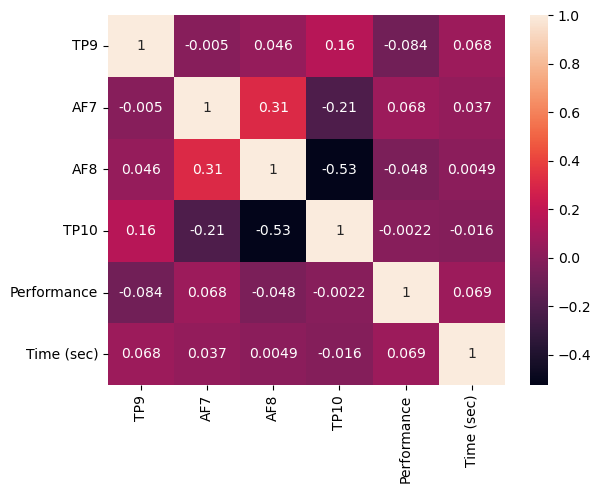

In [612]:
sns.heatmap(corr_df.dropna()[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)"]].corr(), annot=True)
plt.show()

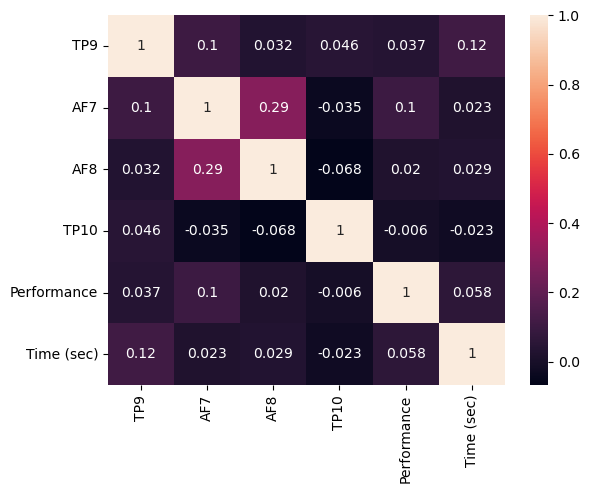

In [613]:
sns.heatmap(corr_df_no_outlier[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)"]].corr(), annot=True)
plt.show()

In [614]:
x = corr_df_no_outlier[["TP9", "AF7", "AF8", "TP10"]]
y = corr_df_no_outlier['Performance']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.6148
Date:                Tue, 21 Mar 2023   Prob (F-statistic):              0.652
Time:                        23:46:54   Log-Likelihood:                -582.73
No. Observations:                 227   AIC:                             1175.
Df Residuals:                     222   BIC:                             1193.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5136      0.215     25.679      0.0

In [82]:
x = corr_df[["TP9", "AF7", "AF8", "TP10"]]
y = corr_df['Performance']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     3.105
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0172
Time:                        22:51:08   Log-Likelihood:                -406.36
No. Observations:                 160   AIC:                             822.7
Df Residuals:                     155   BIC:                             838.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4491      0.250     21.824      0.0

In [34]:
from matplotlib import pyplot as plt

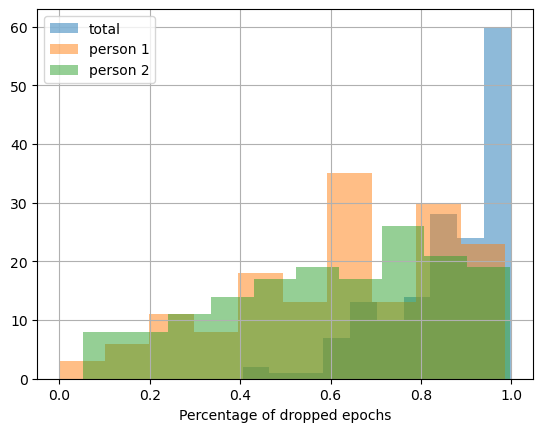

In [88]:
corr_df.dropped_total.hist(alpha=0.5, label="total")
corr_df.dropped_1.hist(alpha=0.5, label="person 1")
corr_df.dropped_2.hist(alpha=0.5, label="person 2")
plt.legend()
plt.xlabel("Percentage of dropped epochs")
plt.show()

(0.12731845970069058, 0.12051698597052449)


/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


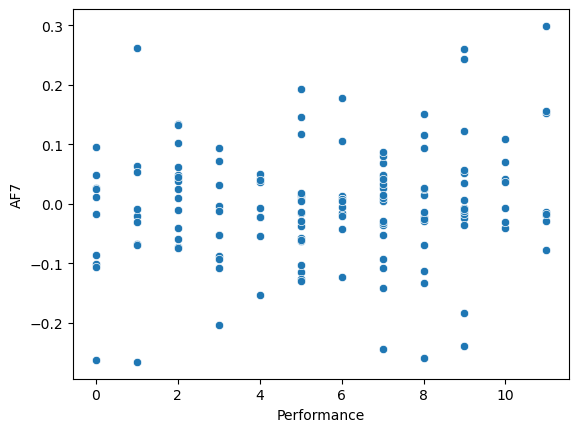

In [172]:
plot_scatter(corr_df, ["Performance", "AF7"], 2)
plt.show()

(-0.1087071899065471, 0.18544465161731993)


/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


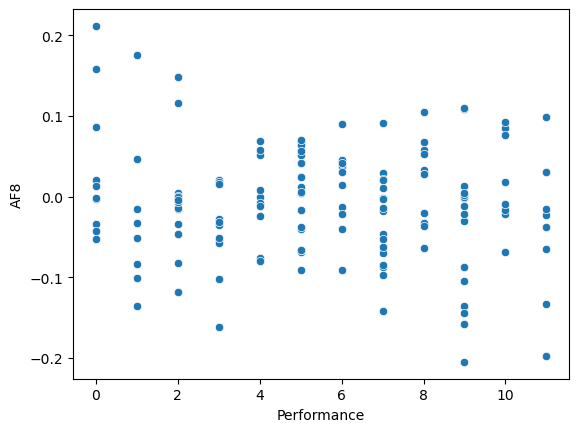

In [177]:
plot_scatter(corr_df, ["Performance", "AF8"], 2)
plt.show()

(-0.07694560534825834, 0.36273882686984454)


/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


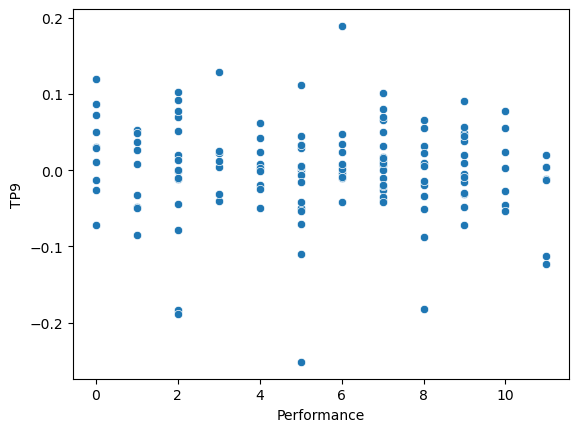

In [175]:
plot_scatter(corr_df.iloc[10:], ["Performance", "TP9"], 2)
plt.show()

(-0.11473618067971757, 0.15514520253331449)


/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


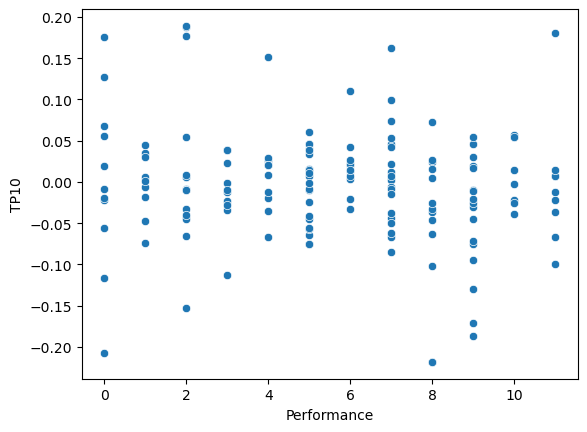

In [176]:
plot_scatter(corr_df, ["Performance", "TP10"], 2)
plt.show()

(-0.20218642519052285, 0.07208618994039946)


/home/jasongong/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


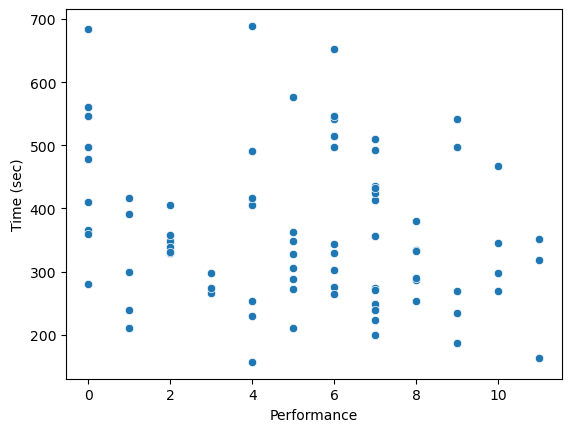

In [133]:
plot_scatter(corr_df.iloc[10:], ["Performance", "Time (sec)"], 2)

<AxesSubplot:xlabel='dropped_2', ylabel='Count'>

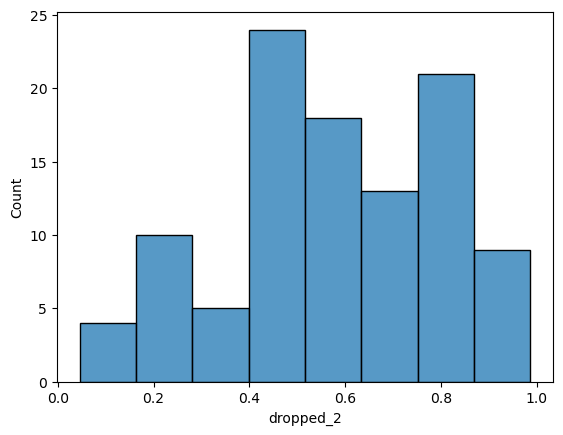

In [286]:
# sns.histplot(corr_df["timing"])
sns.histplot(corr_df["dropped_2"])

In [615]:
corr_df

,TP9,AF7,AF8,TP10,subj,ses,dropped_1,dropped_2,dropped_total,timing,Unnamed: 0,Performance,Time (sec),Signal Drop
1,0.021468,0.029613,0.010839,-0.003866,2,1,0.814925,0.492537,0.910448,5.583333,1.0,0.0,347.0,1.0
2,0.197148,-0.092718,-0.115505,0.051283,2,3,0.942907,0.816609,0.994810,9.633333,2.0,10.0,552.0,0.0
3,-0.020244,0.060562,0.098295,-0.059401,3,1,0.516393,0.819672,0.918033,6.100000,3.0,6.0,271.0,0.0
4,0.070347,0.037173,0.005243,-0.085170,3,2,0.603125,0.784375,0.887500,5.333333,4.0,7.0,294.0,0.0
5,-0.002365,-0.002884,0.046474,0.013973,3,3,0.804795,0.613014,0.914384,4.866667,5.0,7.0,262.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,0.080516,-0.053196,-0.097793,0.073627,172,2,0.858537,0.478049,0.931707,3.416667,343.0,7.0,180.0,0.0
286,-0.432046,0.399743,-0.144200,-0.186687,174,1,0.110403,0.974522,0.980892,7.850000,348.0,9.0,407.0,1.0
287,0.031208,0.015347,0.019999,-0.014736,174,2,0.605479,0.246575,0.676712,6.083333,349.0,7.0,322.0,0.0
288,-0.009230,-0.006618,-0.020977,-0.021123,174,3,0.601399,0.052448,0.611888,4.766667,350.0,9.0,244.0,0.0


In [692]:
corr_df_filter = corr_df[(corr_df.dropped_1 <= 0.7) & (corr_df.dropped_2 <= 0.7)]

corr_df_filter = corr_df_filter[corr_df_filter.timing >= 3.5]


In [900]:
corr_df_filter[["subj", "ses"]]

,subj,ses
9,6,2
10,6,3
13,7,3
19,11,3
26,14,2
...,...,...
279,169,1
280,169,2
287,174,2
288,174,3


In [693]:
# from sklearn.mixture import GaussianMixture
# gmm = GaussianMixture(n_components=2, tol=1, random_state=0).fit(corr_df_filter[["TP10", "AF7", "AF8", "TP9"]])

# labels = gmm.predict(corr_df_filter[["TP10", "AF7", "AF8", "TP9"]])
# labels.sum()

In [694]:
labels

array([0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [695]:
# sns.histplot(corr_df_filter["timing"])
# plt.show()

In [696]:
# corr_df_filter = drop_outlier(corr_df_filter, ["TP9", "AF7", "AF8", "TP10"], 3)

In [697]:
# sns.pairplot(corr_df_filter[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)", "dropped_total"]])
# plt.show()

In [698]:
corr_df_filter.shape

(86, 14)

In [688]:
x = corr_df_filter[["TP9", "AF7", "AF8", "TP10", "ses", "Time (sec)"]]
y = corr_df_filter['Performance']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.451
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0317
Time:                        23:55:25   Log-Likelihood:                -210.93
No. Observations:                  86   AIC:                             435.9
Df Residuals:                      79   BIC:                             453.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5734      1.406      1.119      0.2

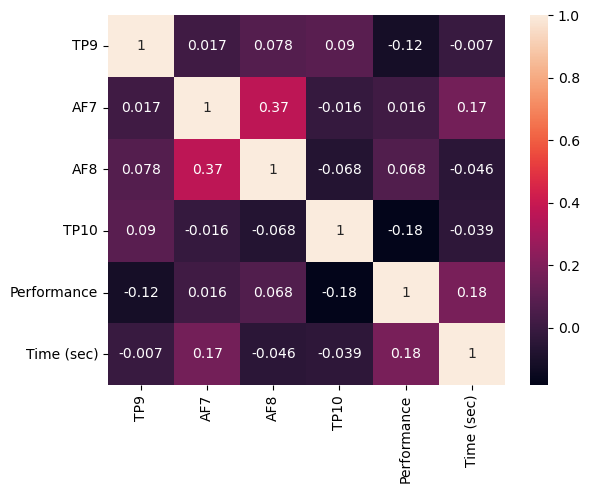

In [675]:
sns.heatmap(corr_df_filter[["TP9", "AF7", "AF8", "TP10", "Performance", "Time (sec)"]].corr(), annot=True)
plt.show()

In [659]:
from matplotlib import pyplot as plt
import seaborn as sns

In [660]:
corr_df_filter.subj.unique().shape

(70,)

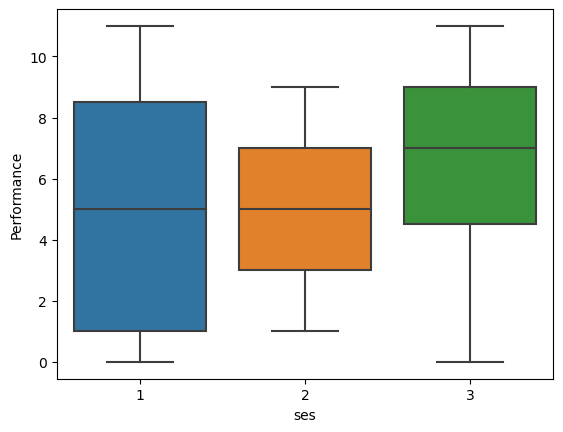

In [689]:
sns.boxplot(x = corr_df_filter.ses, y = corr_df_filter["Performance"])
plt.show()

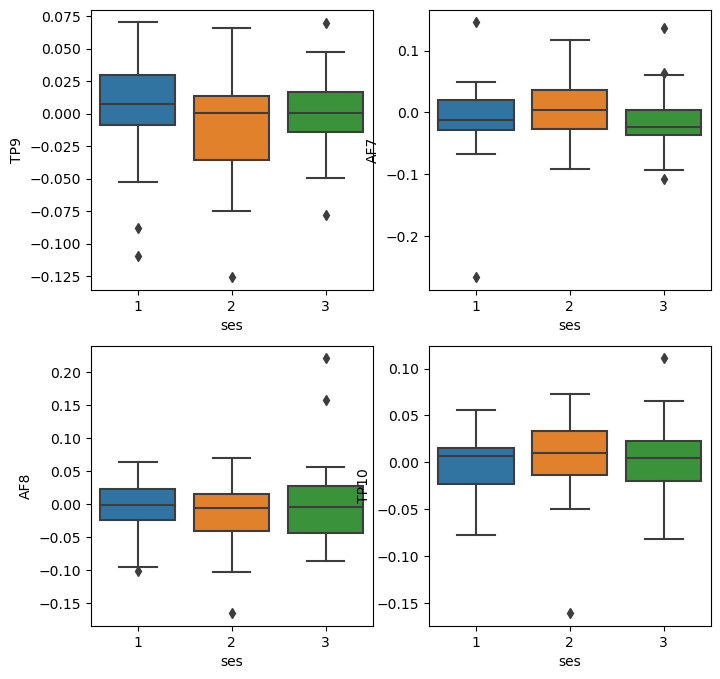

In [690]:
fig, axs = plt.subplots(2,2,figsize=(8,8))

channels = ["TP9", "AF7", "AF8", "TP10"]
for i in range(4):
    sns.boxplot(x = corr_df_filter.ses, y = corr_df_filter[channels[i]], ax=axs[i//2, i%2])

plt.show()

In [663]:
import statsmodels.api as sm

from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM

In [664]:
channels = ["AF8", "AF7", "TP10", "TP9", "Performance"]
for channel in channels:
    l_model = ols('{} ~ C(ses)'.format(channel),
                 data=corr_df_filter.dropna()).fit()
    table = sm.stats.anova_lm(l_model) # Type 2 ANOVA DataFrame
    print("=========================== AVNOVA Table ========================")
    print("================= {} ~ Session ====================". format(channel))
    print(table)

=========================== AVNOVA Table ========================
================= AF8 ~ Session ====================
            df    sum_sq   mean_sq         F    PR(>F)
C(ses)     2.0  0.002740  0.001370  0.450414  0.638913
Residual  83.0  0.252471  0.003042       NaN       NaN
=========================== AVNOVA Table ========================
================= AF7 ~ Session ====================
            df    sum_sq   mean_sq         F   PR(>F)
C(ses)     2.0  0.005806  0.002903  0.990901  0.37559
Residual  83.0  0.243182  0.002930       NaN      NaN
=========================== AVNOVA Table ========================
================= TP10 ~ Session ====================
            df    sum_sq   mean_sq         F    PR(>F)
C(ses)     2.0  0.000300  0.000150  0.101111  0.903944
Residual  83.0  0.122987  0.001482       NaN       NaN
=========================== AVNOVA Table ========================
================= TP9 ~ Session ====================
            df    sum_sq   mean

In [665]:
from statsmodels.multivariate.manova import MANOVA

In [666]:
maov = MANOVA.from_formula(' AF8 + AF7 + TP10 + TP9 ~ C(ses)', data=corr_df_filter)

In [667]:
print(maov.mv_test())

                  Multivariate linear model
                                                             
-------------------------------------------------------------
        Intercept        Value  Num DF  Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda 0.9899 4.0000 80.0000  0.2044 0.9352
          Pillai's trace 0.0101 4.0000 80.0000  0.2044 0.9352
  Hotelling-Lawley trace 0.0102 4.0000 80.0000  0.2044 0.9352
     Roy's greatest root 0.0102 4.0000 80.0000  0.2044 0.9352
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         C(ses)         Value  Num DF  Den DF  F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda 0.9203 8.0000 160.0000  0.8484 0.5616
         Pillai's trace 0.0801 8.0000 162.0000  0.8448 0.5646
 Hotelling-Lawley trace 0.

In [668]:
x = corr_df_filter.dropna()[["TP9", "AF7", "AF8", "TP10", "ses", "Time (sec)"]]
y = corr_df_filter.dropna()['Performance']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.157
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.451
Date:                Tue, 21 Mar 2023   Prob (F-statistic):             0.0317
Time:                        23:53:11   Log-Likelihood:                -210.93
No. Observations:                  86   AIC:                             435.9
Df Residuals:                      79   BIC:                             453.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5734      1.406      1.119      0.2

In [669]:
corr_df_filter.subj.unique().shape

(70,)

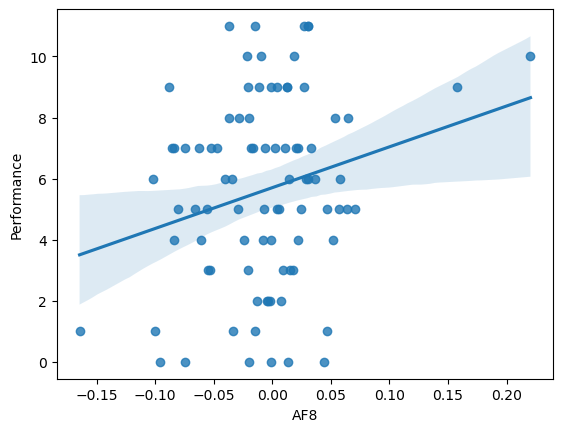

In [671]:
sns.regplot(y="Performance", x="AF8", data=corr_df_filter)
plt.show()

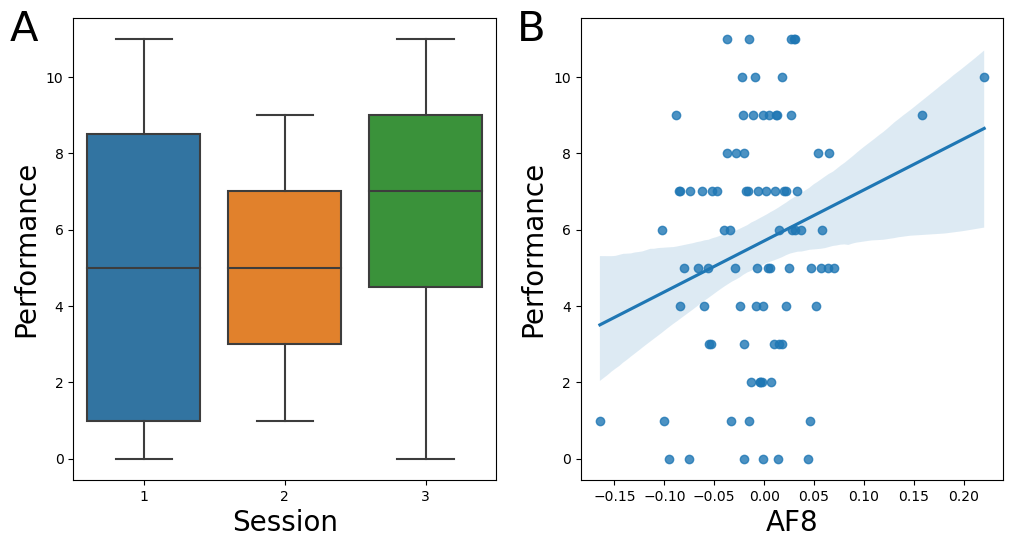

In [691]:
fig, ax = plt.subplots(1,2, figsize=(12,6))
sns.boxplot(x = corr_df_filter.ses, y = corr_df_filter["Performance"], ax=ax[0])
sns.regplot(y="Performance", x="AF8", data=corr_df_filter, ax=ax[1])

# ax[0].set_title("Title",fontsize=50)
ax[0].set_xlabel("Session",fontsize=20)
ax[0].set_ylabel("Performance",fontsize=20)

ax[1].set_xlabel("AF8",fontsize=20)
ax[1].set_ylabel("Performance",fontsize=20)

ax[0].annotate("A", fontsize= 30, xy=(-0.15, 0.95), xycoords="axes fraction")
ax[1].annotate("B", fontsize= 30, xy=(-0.15, 0.95), xycoords="axes fraction")

plt.show()

In [239]:
l_model = ols('Performance ~ C(ses) + AF8 + C(ses)*AF8', data=corr_df_filter).fit()
table = sm.stats.anova_lm(l_model) # Type 2 ANOVA DataFrame
print(table)

              df      sum_sq    mean_sq         F    PR(>F)
C(ses)       2.0   69.334455  34.667227  5.499366  0.008853
AF8          1.0   39.292360  39.292360  6.233065  0.017880
C(ses):AF8   2.0    7.465497   3.732749  0.592137  0.559091
Residual    32.0  201.723478   6.303859       NaN       NaN


In [240]:
print(l_model.summary())

                            OLS Regression Results                            
Dep. Variable:            Performance   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     3.683
Date:                Thu, 27 Oct 2022   Prob (F-statistic):            0.00958
Time:                        20:30:00   Log-Likelihood:                -85.637
No. Observations:                  38   AIC:                             183.3
Df Residuals:                      32   BIC:                             193.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.5119      0.922     